# Linear Regression
## Marcin Biela

In [118]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

## Linear reggresion with one variable

In [119]:
# Load data
path = os.getcwd() + '/ex1data1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])

In [120]:
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [121]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


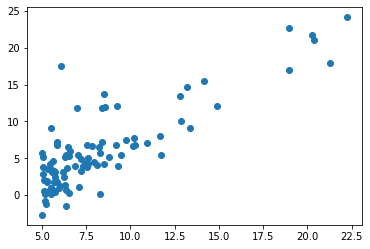

In [122]:
# Plot and analyze the data, where: x - population, y - profit
fig, ax  = plt.subplots()
ax.scatter(data['Population'], data['Profit'])

In [123]:
# Ex. 3 In order to make this cost function work (intercept value θ0 has to be multiplied by 1) we need to insert a column of ones at the beginning of the data frame.
d_len = len(data)
data.insert(0, "Ones", 1)
data.head()


,Ones,Population,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [124]:
# Ex 4 - We need to separate our data into independent variables X (column 0,1) and our dependent variable y (col. 2).
X = data[['Ones', 'Population']]
y = data['Profit']


In [125]:
# Changing variable type to numpy_array and creating a theta variable
X_t = np.array(X.values)
y_t = np.array(y.values)
theta_t = np.array(np.array([0, 0]))

In [126]:
# Ex. 5 The cost function evaluates the quality of our model by calculating the error between our model’s prediction for a data point, using the model parameters, and the actual data point. Please write the cost function based on X,y and parameter θ.

def computeCost(X, y, theta) -> float:
    """
    The cost function evaluates the quality of our model by calculating the error between our model’s prediction for a data point, using the model parameters,
    and the actual data point. Please write the cost function based on X,y and parameter θ.
    Params: X: np.ndarray
            y: np.ndarray
            theta: np.ndarray
    
    return cost: float
    """
    m = len(y)

    predictions = X.dot(theta)
    cost = (1/(2*m)) * np.sum(np.square(predictions - y))
    return cost


In [127]:
test1 = computeCost(X_t, y_t, theta_t)
print(test1)

32.072733877455676


In [128]:
# Ex. 7 Please implement the gradient descent algorithm: the function returns optimized values θ and a vector of the cost function value for each iteration

# https://towardsdatascience.com/gradient-descent-in-python-a0d07285742f

def simple_gradient(X, y, theta, alpha, it):
    """
    The cost function evaluates the quality of our model by calculating the error between our model’s prediction for a data point, using the model parameters,
    and the actual data point. Please write the cost function based on X,y and parameter θ.
    Params: X: np.ndarray
            y: np.ndarray
            alpha: float - learning rate
            it: int - number of iterations
    
    return theta, cost_history: Tuple[np.ndarray, list[float]]
    """
    m = len(y)
    cost_history = np.zeros(it)
    theta_history = np.zeros((it, 2))

    for i in range(it):
        prediction = np.dot(X, theta)
        theta = theta - (1/m)*alpha*(X.T.dot(prediction - y))
        theta_history[i, :] = theta.T
        cost_history[i] = computeCost(X, y, theta)
        
    return theta, cost_history

In [129]:
# Testing simple_gradient functions with alpha=0.01, it=1500
gradient = simple_gradient(X_t, y_t, theta_t, 0.01, 1500)
gradient

(array([-3.63029144,  1.16636235]),
 array([6.73719046, 5.93159357, 5.90115471, ..., 4.48343473, 4.48341145,
        4.48338826]))

In [130]:
theta_best = np.linalg.inv(X_t.T.dot(X_t)).dot(X.T).dot(y_t)
theta_best

array([-3.89578088,  1.19303364])

In [131]:
# evaluate theta0 and theta1 and creating a y_pred
theta0 = gradient[0][0]
theta1 = gradient[0][1]

y_pred = theta0 + theta1*X_t

(4.0, 23.0)

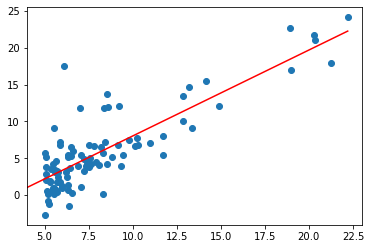

In [132]:
"Plot a dataset with LinearRegression line"
fig, ax = plt.subplots()
ax.scatter(X_t[:, 1], y_t)
# https://www.geeksforgeeks.org/how-to-implement-a-gradient-descent-in-python-to-find-a-local-minimum/
ax.plot([np.min(X_t), np.max(X_t)], [np.min(y_pred), np.max(y_pred)], 'r-' )
ax.set_xlim(4, 23)

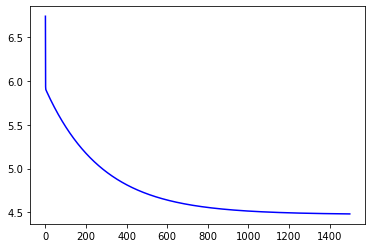

In [133]:
# Plot the relationship between the cost function and number of iterations
fig, ax = plt.subplots()
ax.plot([i for i in range(0, 1500)], gradient[1], 'b-' )

## Linear regression with multiple variables

In [134]:
# Load dataset
path = os.getcwd() + '\\ex1data2.txt'
data2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [135]:
# Standarize data using z = (x - u) / s for each columns
data2["Size"] = (data2["Size"] - data2["Size"].mean())/data2["Size"].std()
data2["Bedrooms"] = (data2["Bedrooms"] - data2["Bedrooms"].mean())/data2["Bedrooms"].std()
data2["Price"] = (data2["Price"] - data2["Price"].mean())/data2["Price"].std()
data2.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [136]:
# Ex 4 We need to separate our data into independent variables X (column 0,1) and our dependent variable y (col. 2)
X_t2 = data2[["Size", "Bedrooms"]]
y_t2 = data2["Price"]
X_t2 = np.array(X_t2)
y_t2 = np.array(y_t2)
theta_t2 = np.array(np.array([0, 0]))
X_t2

array([[ 1.30009869e-01, -2.23675187e-01],
       [-5.04189838e-01, -2.23675187e-01],
       [ 5.02476364e-01, -2.23675187e-01],
       [-7.35723065e-01, -1.53776691e+00],
       [ 1.25747602e+00,  1.09041654e+00],
       [-1.97317285e-02,  1.09041654e+00],
       [-5.87239800e-01, -2.23675187e-01],
       [-7.21881404e-01, -2.23675187e-01],
       [-7.81023044e-01, -2.23675187e-01],
       [-6.37573110e-01, -2.23675187e-01],
       [-7.63567023e-02,  1.09041654e+00],
       [-8.56737193e-04, -2.23675187e-01],
       [-1.39273340e-01, -2.23675187e-01],
       [ 3.11729182e+00,  2.40450826e+00],
       [-9.21956312e-01, -2.23675187e-01],
       [ 3.76643089e-01,  1.09041654e+00],
       [-8.56523009e-01, -1.53776691e+00],
       [-9.62222960e-01, -2.23675187e-01],
       [ 7.65467909e-01,  1.09041654e+00],
       [ 1.29648433e+00,  1.09041654e+00],
       [-2.94048269e-01, -2.23675187e-01],
       [-1.41790005e-01, -1.53776691e+00],
       [-4.99156507e-01, -2.23675187e-01],
       [-4.

In [137]:
# gradient2D = simple_gradient(X_t2, y_t2, theta_t2, 0.01, 1500)
computeCost(X_t2, y_t2, theta_t2) # Działa

0.4893617021276595

In [138]:
# Testing simple_gradient functions with alpha=0.01, it=1500
gradient = simple_gradient(X_t2, y_t2, theta_t2, 0.01, 1500)
gradient

(array([ 0.88404235, -0.05245518]),
 array([0.4805491 , 0.47198588, 0.46366462, ..., 0.13068671, 0.13068671,
        0.13068671]))

In [139]:
theta_best = np.linalg.inv(X_t2.T.dot(X_t2)).dot(X_t2.T).dot(y_t2)
theta_best

array([ 0.88476599, -0.05317882])

In [140]:
# evaluate theta0 and theta1 and creating a y_pred
theta0 = gradient[0][0]
theta1 = gradient[0][1]

y_pred2 = theta0 + theta1*X_t

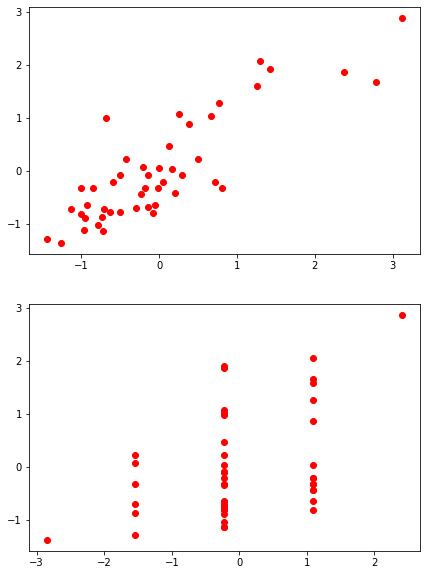

In [141]:
# ploting dataset
fig, ax = plt.subplots(2, 1)
fig.set_size_inches(7, 10)
ax[0].scatter(X_t2[:, 0], y_t2, color='red')
ax[1].scatter(X_t2[:, 1], y_t2, color='red')

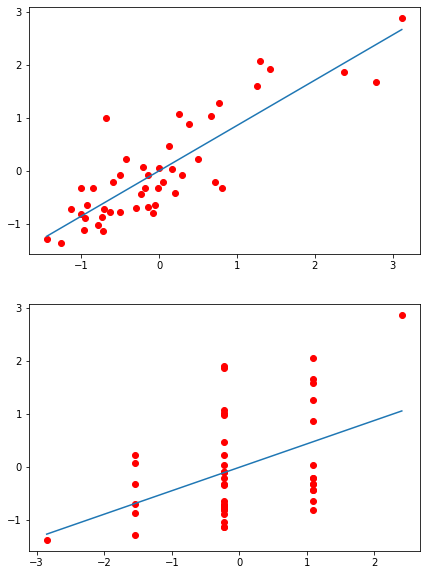

In [142]:
fig, ax = plt.subplots(2,1)
fig.set_size_inches(7, 10)
for i in range(X_t2.shape[1]):
    ax[i].scatter(X_t2[:, i], y_t2, color='red')
    # Działa ale nie wiem dlaczego wten sposób to plotować
    # https://www.geeksforgeeks.org/how-to-implement-a-gradient-descent-in-python-to-find-a-local-minimum/
    # Dziwny wynik - sprawdzić czy StandardScaler dobrze zadziałał
    # ax[i].plot([np.min(X_t2[:, i]), np.max(X_t2[:, i])], [np.min(y_pred2), np.max(y_pred2)], 'r-' )
    ax[i].plot(np.unique(X_t2[:, i]), np.poly1d(np.polyfit(X_t2[:, i], y_t2, 1))(np.unique(X_t2[:, i])))
# ax.set_xlim(4, 23)

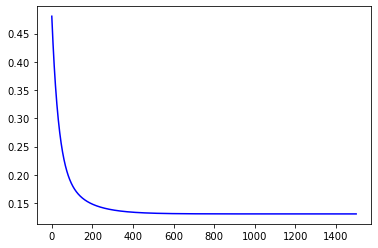

In [143]:
# Plot the relationship between the cost function and number of iterations.
fig, ax = plt.subplots()
ax.plot([i for i in range(0, 1500)], gradient[1], 'b-' )

## Linear regression - Python packages

In [144]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model as linm
 
# Regression models
# http://scikit-learn.org/stable/modules/linear_model.html
 
# Load the diabetes dataset
boston = datasets.load_boston()
# print description
print(boston.DESCR)
# get the data
boston_X = boston.data
boston_Y = boston.target
type(boston_Y)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

numpy.ndarray

In [145]:
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

# Data import
boston_X = boston.data
boston_Y = boston.target

boston_Y = boston_Y.reshape(-1, 1)

# Normalization
scaler = StandardScaler() 
boston_X = scaler.fit_transform(boston_X)
boston_Y = scaler.fit_transform(boston_Y)

# Split into train and test sets (70-30%)
X_train, X_test, Y_train, Y_test = train_test_split(
    boston_X, boston_Y, test_size=0.3, random_state=42
)

# Creating an object 
regr = linear_model.LinearRegression()
 
# Learning model on training data
regr.fit(X_train, Y_train)
# Predicting values using test data
Y_predicted = regr.predict(X_test)
 
# Regression coefficients (theta)
print('Coefficients: \n', regr.coef_)
 
#  Residual sum of squares error
error = np.mean((regr.predict(X_test) - Y_test) ** 2)
print("Residual sum of squares: {}".format(error))

r2_error = r2_score(Y_test, Y_predicted)
print(f"R2 error: {r2_error}")

Coefficients: 
 [[-0.12482724  0.09080594  0.0369402   0.08615968 -0.19424518  0.30995167
  -0.03311849 -0.31732929  0.2297995  -0.15946862 -0.21437007  0.11707405
  -0.42480435]]
Residual sum of squares: 0.254886962345226
R2 error: 0.7112260057484925


In [146]:
X_test.shape

(152, 13)

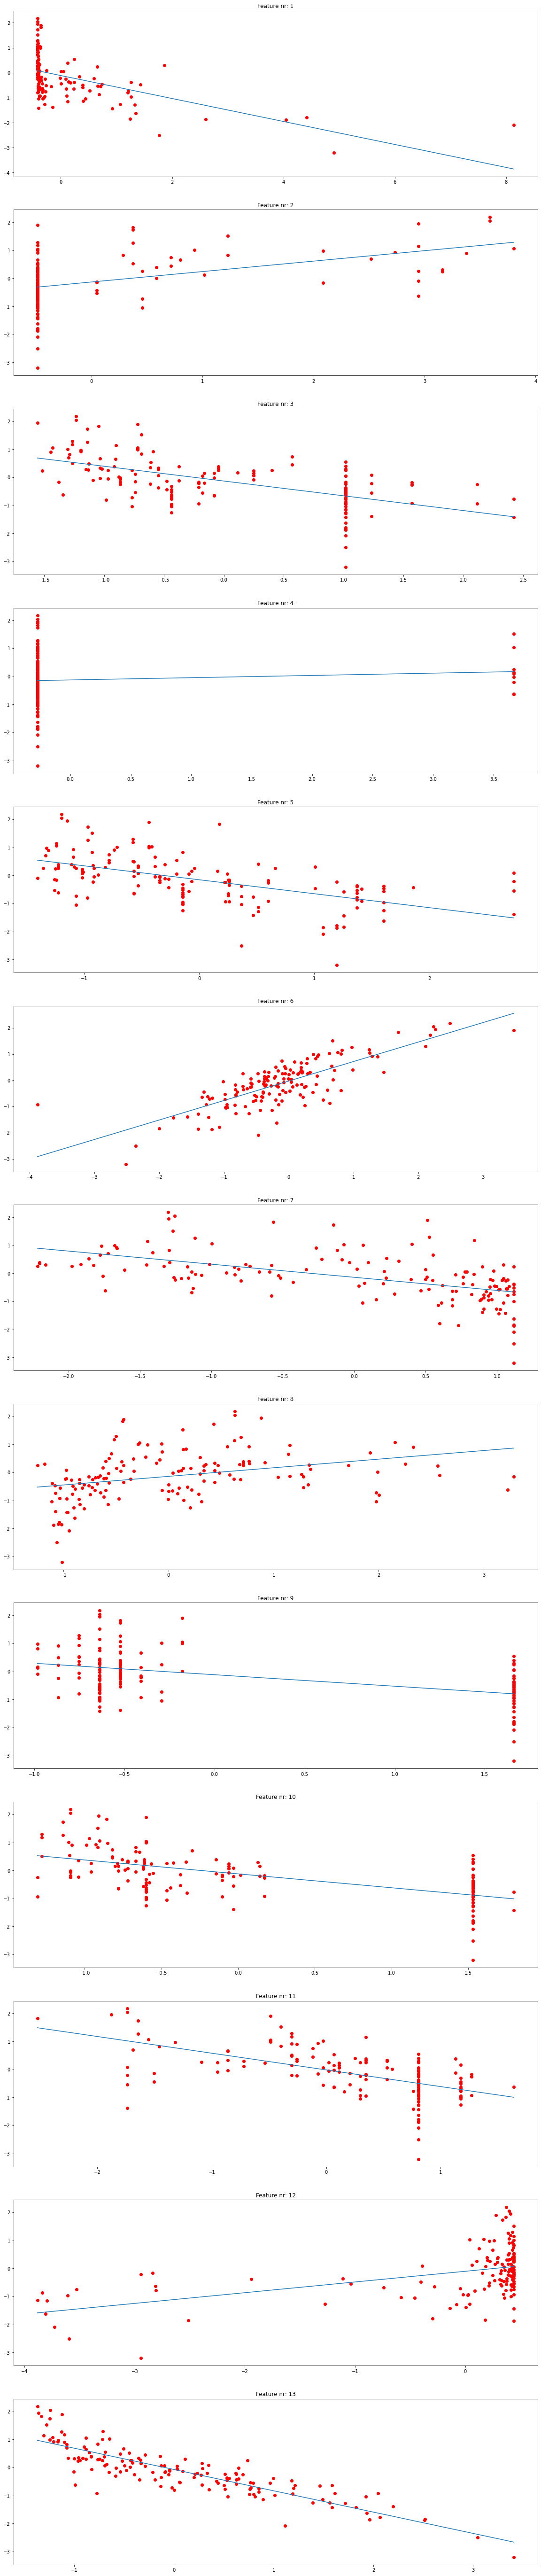

In [147]:
# Ploting a LinearRegression for each feature
fig, ax = plt.subplots(13, 1)
fig.set_size_inches(20, 100)
for i in range(X_test.shape[1]):
    X = np.resize(X_test[:, i], (len(X_test[:, i]),))
    Y_predicted = np.resize(Y_predicted, (len(Y_predicted), ))
    ax[i].scatter(X, Y_predicted, color='red')
    ax[i].plot(np.unique(X), np.poly1d(np.polyfit(X, Y_predicted, 1))(np.unique(X)))
    # ax[i].set_ylim(np.min(X[1]), np.max(X[1]))
    ax[i].set_title(f"Feature nr: {i+1}")
plt.show()



# Compare the Linear Regression models

In [148]:
# Importing MSE from metrics package
from sklearn.metrics import mean_squared_error

In [149]:
reg_LinReg  = linear_model.LinearRegression()

# Learning model on training data
reg_LinReg.fit(X_train, Y_train)
# Predicting values using test data
Y_predicted = reg_LinReg.predict(X_test)
print(f"MSE for LinearRegression: {mean_squared_error(Y_test, Y_predicted)}")

MSE for LinearRegression: 0.254886962345226


In [150]:
reg_Ridge = linm.Ridge(alpha = .5)
# Learning model on training data
reg_Ridge.fit(X_train, Y_train)
# Predicting values using test data
Y_predicted = reg_Ridge.predict(X_test)
print(f"MSE for Ridge: {mean_squared_error(Y_test, Y_predicted)}")

MSE for Ridge: 0.2550711663714017


In [151]:
reg_Lasso = linm.Lasso(alpha = 5.1)
# Learning model on training data
reg_Lasso.fit(X_train, Y_train)
# Predicting values using test data
Y_predicted = reg_Lasso.predict(X_test)
print(f"MSE for reg_Lasso: {mean_squared_error(Y_test, Y_predicted)}")

MSE for reg_Lasso: 0.9132779202669097


In [152]:
reg_ElNet =linm.ElasticNet(alpha = .5, l1_ratio=0.5)
# Learning model on training data
reg_ElNet.fit(X_train, Y_train)
# Predicting values using test data
Y_predicted = reg_ElNet.predict(X_test)
print(f"MSE for reg_ElNet: {mean_squared_error(Y_test, Y_predicted)}")

MSE for reg_ElNet: 0.4101099532743589


# Conclusion
In this chapter I learned how to create a Linear Reggresion models for one and multiple features. I have to implement a cost functin and gradient function. In that way I have become familiar with background of LinearRegression.
I also learned how to use python package for LinearReggresion models for dataset with many features. Before learning model I had to stadarize a data using StandardScaler module. It is necessery if i want to compare a many type of data.

In last part of exercise I compared a four type of LinearRegression such as: LinearRegression, Ridge, Lasso, ElasticNet.
Observation shows that, the best type is LinearRegression, marginally worse is Ridge, but the worst type is Lasso with MSE around 0,9.
